# # Advertising Sales Prediction
# 
# In this notebook, we will predict **Sales** based on advertising spend on **TV, Radio, and Newspaper** using multiple regression models and Random Forest. We'll also evaluate model performance and analyze feature importance.

First 5 rows:
       TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

Dataset Info:
 None

Dataset Description:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000

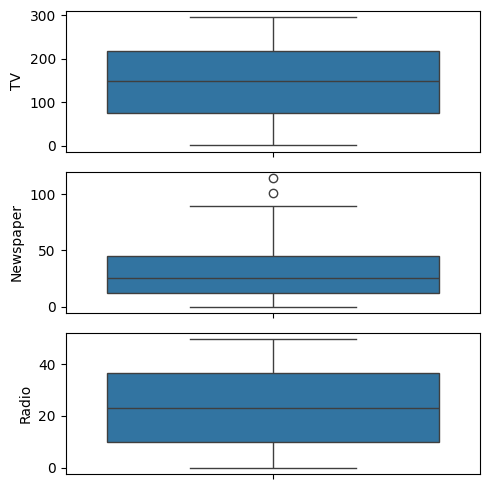

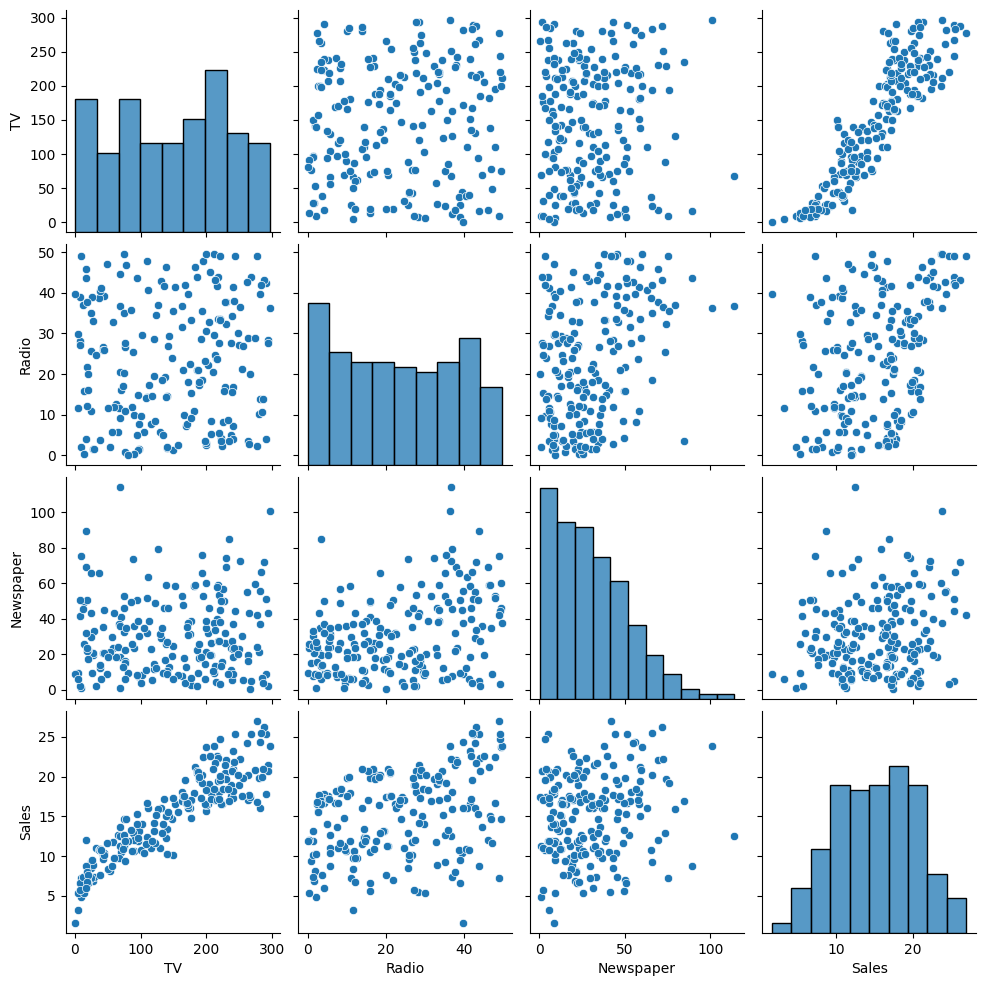

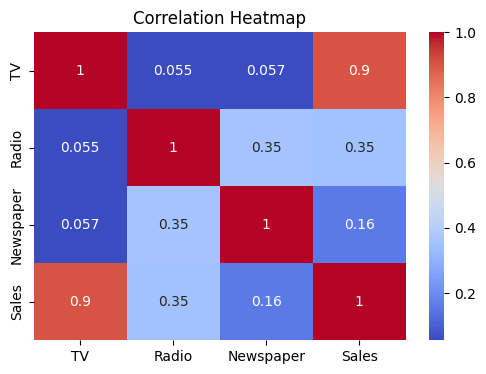

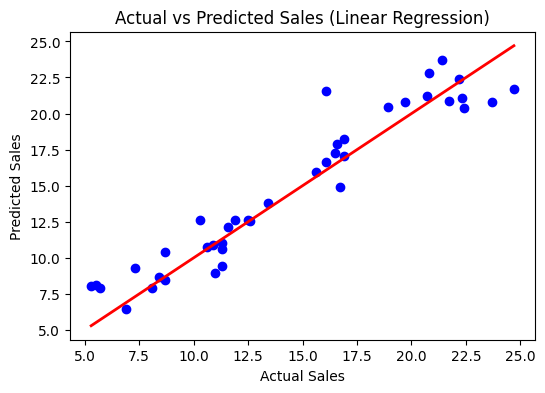


Linear Regression Feature Coefficients:
            Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337


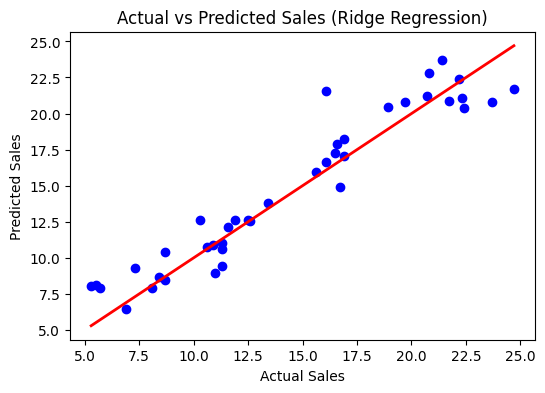


Ridge Regression Feature Coefficients:
            Coefficient
TV            0.054509
Radio         0.100942
Newspaper     0.004338


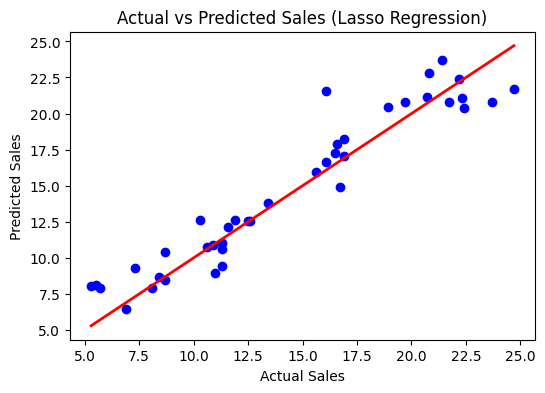


Lasso Regression Feature Coefficients:
            Coefficient
TV            0.054499
Radio         0.100562
Newspaper     0.004202


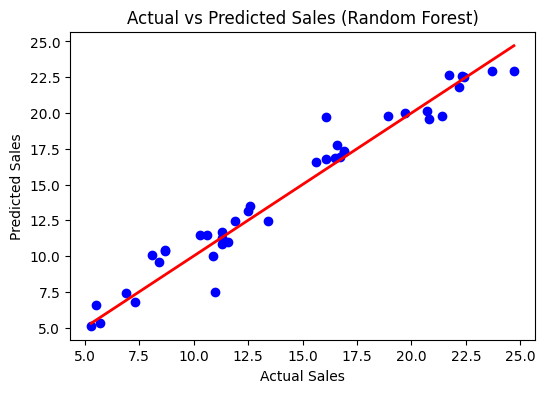


Random Forest Feature Importance:
            Importance
TV           0.845355
Radio        0.136642
Newspaper    0.018003

Model Comparison:
                         MSE      RMSE        R2
Linear Regression  2.907757  1.705215  0.905901
Ridge Regression   2.907796  1.705226  0.905900
Lasso Regression   2.909322  1.705674  0.905851
Random Forest      1.437433  1.198930  0.953483


Synthetic Test Dataset:
     TV  Radio  Newspaper
0  136     21          8
1  112     31         41
2  217     15         15
3  166     17         48
4  276     28         75
5  187     18         23
6  184     29         45
7  201     48         50
8  255     37         70
9   66     24         24

Predicted Sales for Synthetic Data:
     TV  Radio  Newspaper  Predicted_Sales
0  136     21          8           13.560
1  112     31         41           14.542
2  217     15         15           19.438
3  166     17         48           17.395
4  276     28         75           19.560
5  187     18         23

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Dataset
df = pd.read_csv("advertising.csv")
print("First 5 rows:\n", df.head())
print("\nDataset Info:\n", df.info())
print("\nDataset Description:\n", df.describe())

print("Lets check for the null values :- ")
print(df.isnull().sum()*100/df.shape[0])

# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

# 3. Exploratory Data Analysis (EDA)
sns.pairplot(df)
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 4. Define Features and Target
X = df[["TV", "Radio", "Newspaper"]]  # Features
y = df["Sales"]                        # Target

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Train Different Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MSE": mse, "RMSE": rmse, "R2": r2}
    
    # Optional: plot actual vs predicted for each model
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title(f"Actual vs Predicted Sales ({name})")
    plt.show()
    
    # Feature importance for linear models
    if name in ["Linear Regression", "Ridge Regression", "Lasso Regression"]:
        coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
        print(f"\n{name} Feature Coefficients:\n", coef_df)
    
    # Feature importance for Random Forest
    if name == "Random Forest":
        feat_importance = pd.DataFrame(model.feature_importances_, X.columns, columns=['Importance'])
        print(f"\n{name} Feature Importance:\n", feat_importance)

# 7. Compare Model Performance
results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n", results_df)


print()
print()


# Generate 10 sample rows of advertising spends
test_data = pd.DataFrame({
    "TV": np.random.randint(50, 300, size=10),          # TV spend between 50k to 300k
    "Radio": np.random.randint(10, 50, size=10),        # Radio spend between 10k to 50k
    "Newspaper": np.random.randint(0, 100, size=10)     # Newspaper spend between 0k to 100k
})

print("Synthetic Test Dataset:\n", test_data)


# ## 9. Predict Sales for Synthetic Data
# Using the best-performing model (Random Forest) to predict sales.

# %%
# Assuming 'rf_model' is the trained Random Forest from previous cells
rf_model = models["Random Forest"]  # Use trained Random Forest model
predicted_sales = rf_model.predict(test_data)

# Add predictions to dataframe
test_data["Predicted_Sales"] = predicted_sales
print("\nPredicted Sales for Synthetic Data:\n", test_data)

